In [1]:
from fastai.vision import *

In [2]:
#defaults.device = torch.device('cuda:0')
np.random.seed(2)

In [3]:
defaults.device = torch.device('cpu:0')

In [5]:
#data_set = untar_data(URLs.MNIST, dest='./data')

In [9]:
data_set.ls()

[WindowsPath('data/mnist_png/models'),
 WindowsPath('data/mnist_png/testing'),
 WindowsPath('data/mnist_png/training')]

In [10]:
data = ImageList.from_folder(data_set)

In [11]:
data

ImageList (587 items)
Image (3, 301, 900),Image (3, 301, 900),Image (3, 301, 900),Image (3, 301, 900),Image (3, 301, 900)
Path: data\mnist_png

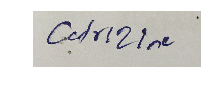

In [14]:
data[14].show()

In [13]:
sd = data.split_by_folder(train='training', valid='testing')

In [14]:
l1 = sd.label_from_folder()
l1

LabelLists;

Train: LabelList (527 items)
x: ImageList
Image (3, 301, 900),Image (3, 301, 900),Image (3, 301, 900),Image (3, 301, 900),Image (3, 301, 900)
y: CategoryList
1,1,1,1,1
Path: data\mnist_png;

Valid: LabelList (60 items)
x: ImageList
Image (3, 301, 900),Image (3, 301, 900),Image (3, 301, 900),Image (3, 301, 900),Image (3, 301, 900)
y: CategoryList
1,1,1,1,1
Path: data\mnist_png;

Test: None

1 torch.Size([3, 301, 900])


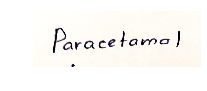

In [15]:
x, y = l1.train[0]

x.show()
print(y, x.shape)

In [18]:
#tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])
tfms = get_transforms(flip_vert=True,max_rotate=180)

In [13]:
ll = l1.transform(tfms)

In [16]:
bs = 16

In [17]:
data = l1.databunch(bs=bs).normalize()

1 torch.Size([3, 301, 900])


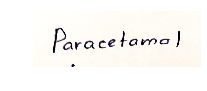

In [18]:
x, y = data.train_ds[0]

x.show()
print(y, x.shape)

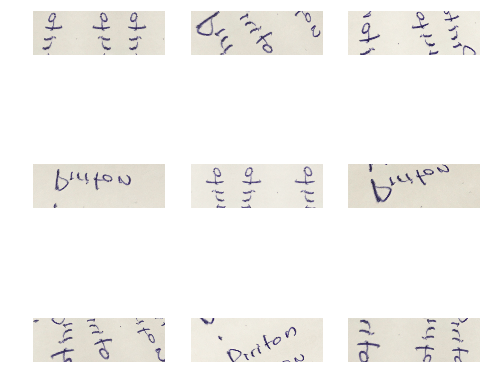

In [105]:
def _plot(i,j,ax): data.train_ds[0][0].show(ax, cmap='gray')
plot_multi(_plot, 3, 3, figsize=(8,8))

In [19]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([16, 3, 301, 900]), torch.Size([16]))

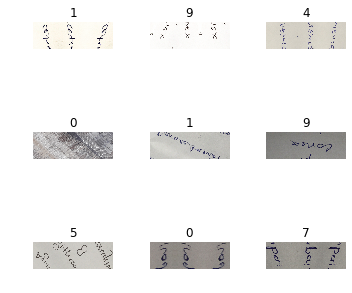

In [18]:
data.show_batch(rows=3, figsize=(5,5))

In [22]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [29]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.063859,0.068280,0.966667,09:18
1,0.050655,0.091052,0.966667,08:59


In [31]:
learn.save('final_testing_res18')

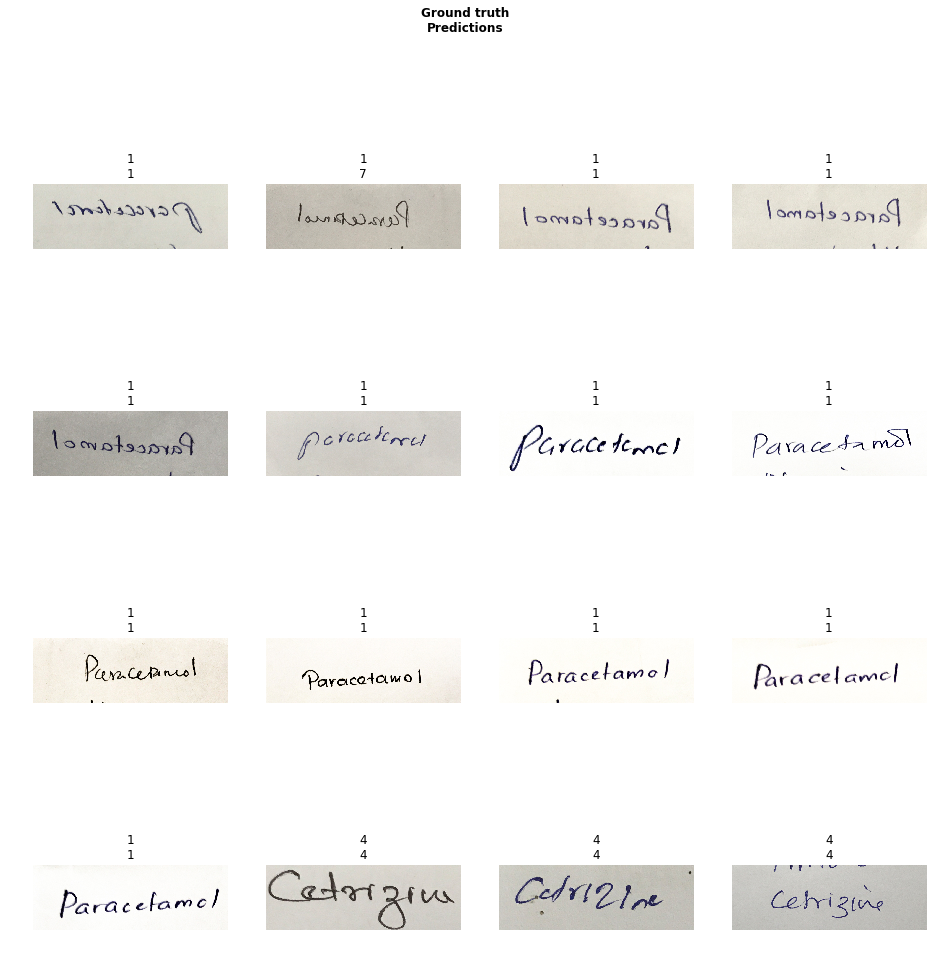

In [32]:
learn.show_results()

In [33]:
interp = ClassificationInterpretation.from_learner(learn)

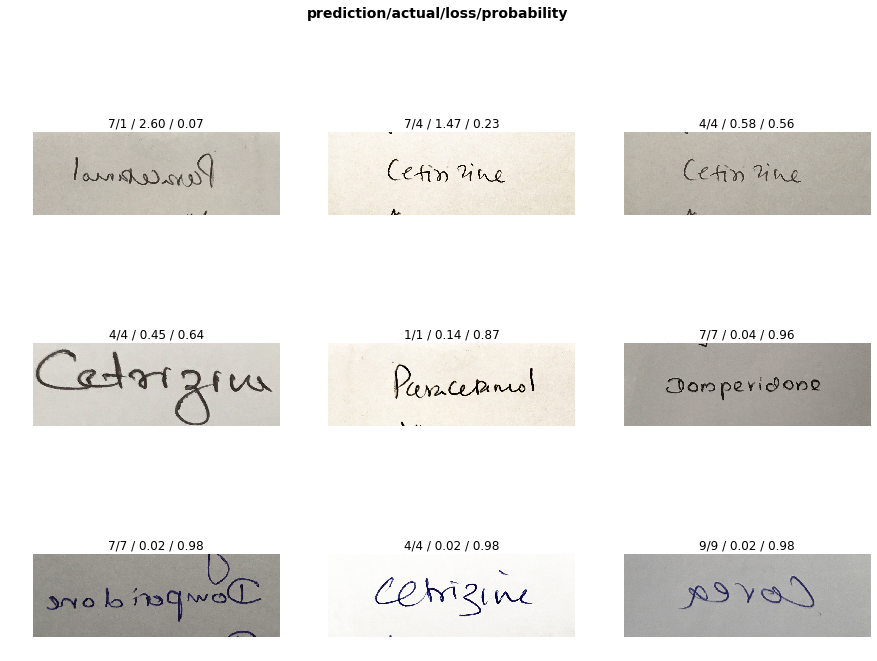

In [34]:
interp.plot_top_losses(9, figsize=(15, 11))

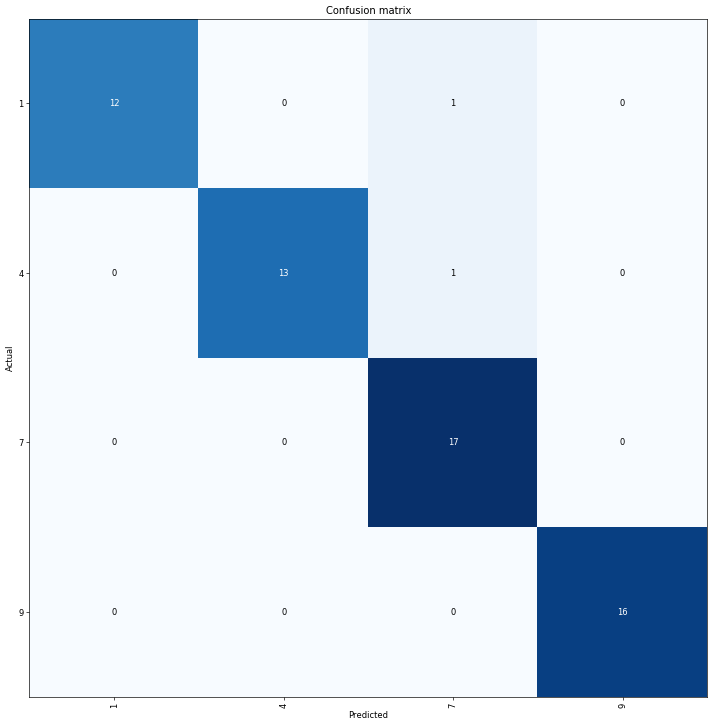

In [35]:
interp.plot_confusion_matrix(figsize=(12,12))

In [58]:
learn.fit_one_cycle(5,max_lr=slice(1e-02, 1))

epoch,train_loss,valid_loss,accuracy,time
0,33.178017,2789322752.000000,0.175258,05:11
1,367.784363,233068304.000000,0.175258,05:09
2,327.801208,32275042.000000,0.144330,05:09
3,230.814911,1025705.625000,0.237113,04:58
4,152.855225,186302.234375,0.247423,05:34


In [39]:
learn.export('c:/Users/Deshan/Desktop/sec_train.pkl')

In [40]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 151, 450]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 151, 450]       128        True      
______________________________________________________________________
ReLU                 [64, 151, 450]       0          False     
______________________________________________________________________
MaxPool2d            [64, 76, 225]        0          False     
______________________________________________________________________
Conv2d               [64, 76, 225]        36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 76, 225]        128        True      
______________________________________________________________________
ReLU                 [64, 76, 225]        0          False     
___________________________________________________